# PRACTICA I-4: Segmentacion Flores Color
Realizar las actividades:

Definicion de librerias

In [1]:
import numpy as np
from cv2 import imread
from google.colab.patches import cv2
import matplotlib.pyplot as plt

In [2]:
def howis(img):
  print('size = ',img.shape)
  print('min = ',np.min(img))
  print('max = ',np.max(img))

Cargar la imagen a color y desplegarla)
- La imagen se está leyendo con un comando “imread”, lee la imagen y la guarda en la
variable Icv
- Se muestra una imagen de 512 x 512, tiene 3 canales RGB (opencv lo lee como BGR)
- RESPONDER LA PREGUNTA: ¿Porque opencv lo graba con BGR?



In [8]:
!wget https://uc6adf5f6b37b8b94290379b0af9.dl.dropboxusercontent.com/cd/0/inline/CbvGqhAQC91SclyxyawZix0Ji0BeuSIIhX8tiJw_aX65ecKri0fh33mIx94GC6Ypix575yr4Vs53j-AFWxhcs6tWOPytUII9XN6P-VGq8VacgStBaORBsuOUifTCz1ONhoha0tOzwGVXHDWn62g9q1F-/file

--2024-10-02 22:11:53--  https://uc6adf5f6b37b8b94290379b0af9.dl.dropboxusercontent.com/cd/0/inline/CbvGqhAQC91SclyxyawZix0Ji0BeuSIIhX8tiJw_aX65ecKri0fh33mIx94GC6Ypix575yr4Vs53j-AFWxhcs6tWOPytUII9XN6P-VGq8VacgStBaORBsuOUifTCz1ONhoha0tOzwGVXHDWn62g9q1F-/file
Resolving uc6adf5f6b37b8b94290379b0af9.dl.dropboxusercontent.com (uc6adf5f6b37b8b94290379b0af9.dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6031:15::a27d:510f
Connecting to uc6adf5f6b37b8b94290379b0af9.dl.dropboxusercontent.com (uc6adf5f6b37b8b94290379b0af9.dl.dropboxusercontent.com)|162.125.81.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143083 (140K) [image/jpeg]
Saving to: ‘file’

file                100%[===================>] 139.73K  --.-KB/s    in 0.004s  

2024-10-02 22:11:54 (35.6 MB/s) - ‘file’ saved [143083/143083]



In [4]:
from google.colab.patches import cv2_imshow

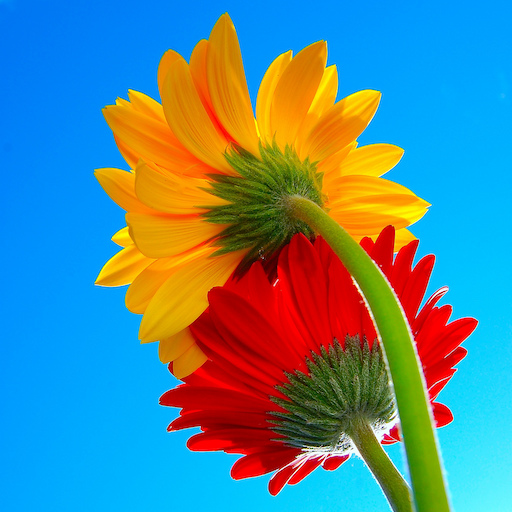

size =  (512, 512, 3)
min =  0
max =  255


In [10]:
import os
os.rename('file', 'girasol.jpg')
Icv = imread('girasol.jpg')
cv2_imshow(Icv)
howis(Icv)

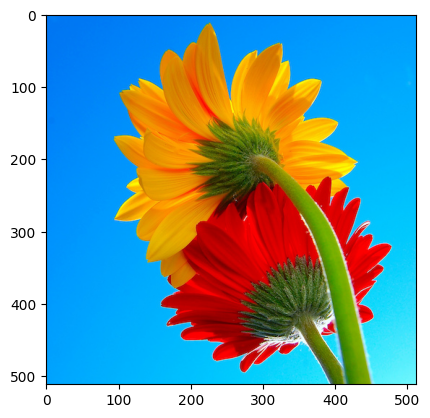

In [11]:
I = Icv[:,:,[2,1,0]]   # conversión a formato estándar (RGB)
plt.imshow(I)
plt.show()

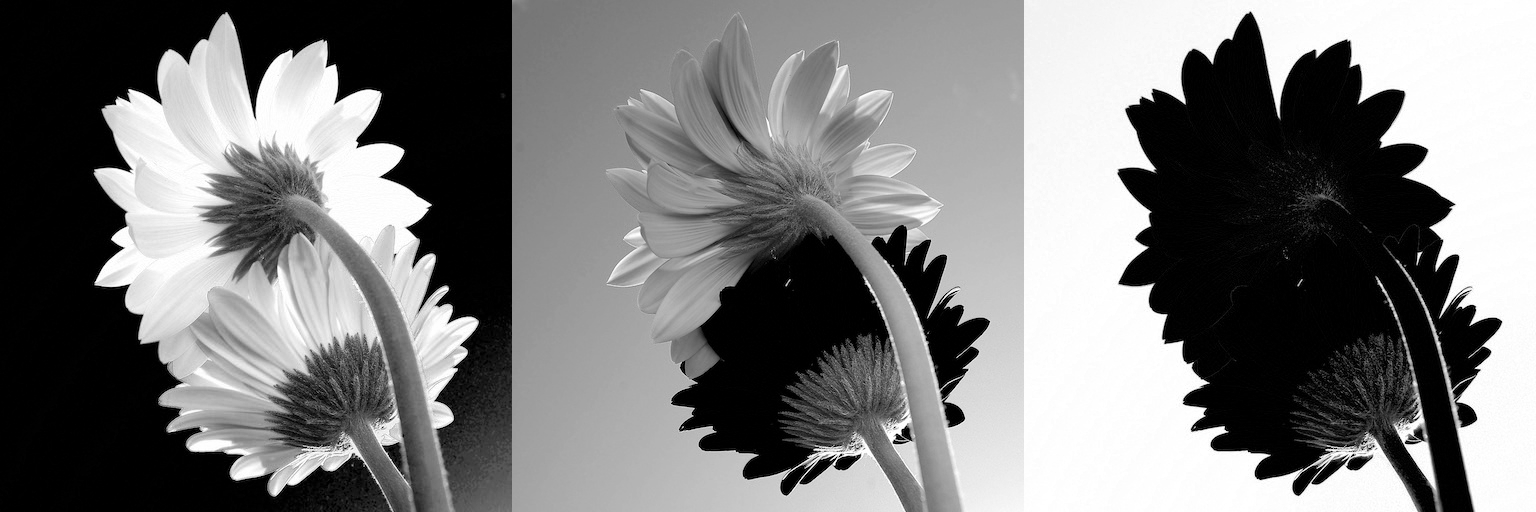

In [12]:
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]
RGB = np.concatenate((R,G,B),axis=1)
cv2_imshow(RGB)

size =  (512, 512)
min =  0
max =  255


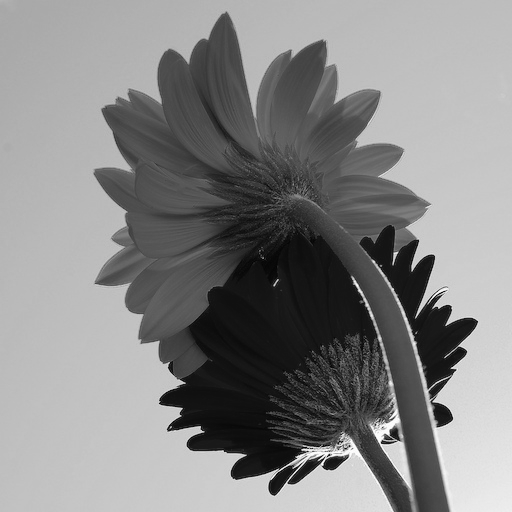

In [13]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)
#k = (1/3,1/3,1/3)
k = (0.1,0.4,0.5)
Zd = k[0]*Rd + k[1]*Gd + k[2]*Bd
Z = Zd.astype(int)
howis(Z)
cv2_imshow(Z)

In [14]:
k = (0.1,0.4,0.5)

In [15]:
def imhist(X):
    (N,M) = X.shape
    n = 256
    h = np.zeros((256,))
    for i in range(N):
        for j in range(M):
            x = X[i,j]
            h[x] = h[x]+1
    plt.plot(range(n),h[0:n])
    plt.show()

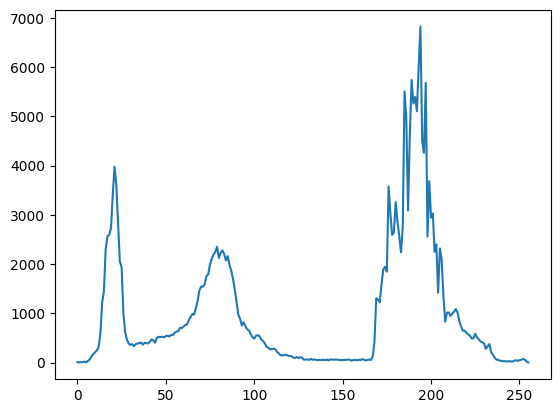

In [17]:
imhist(Z)

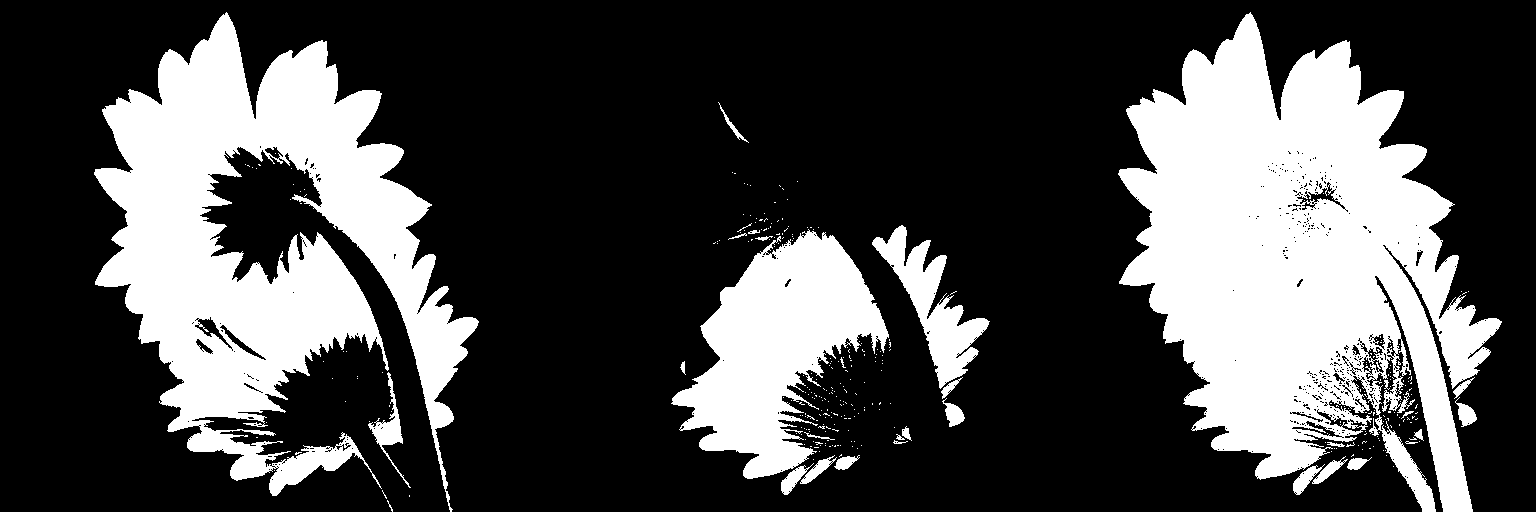

In [18]:
Sr = R>150
Sg = G<40
Sb = B<40
Srgb = np.concatenate ((Sr, Sg, Sb), axis=1)
cv2_imshow(Srgb*255)

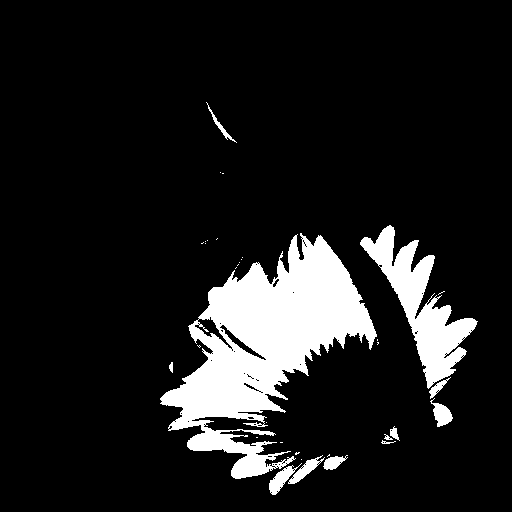

In [19]:
S = np.logical_and(Sr,Sg,Sb)
cv2_imshow(S*255) #Replace if not in Google Colab

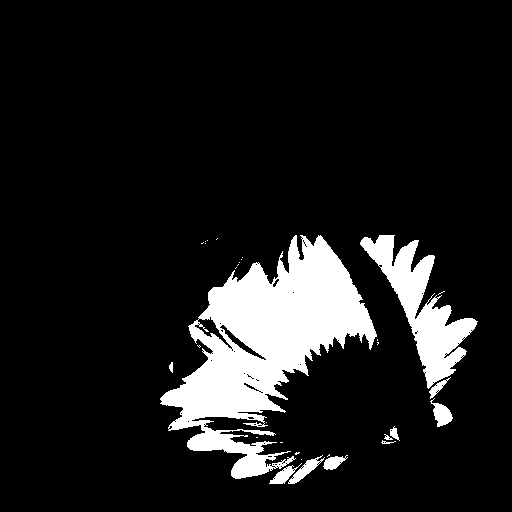

In [20]:
(N,M) = S.shape
Q = S
for i in range(N):
    s = np.sum(S[i,:])
    if s<20:
        Q[i,:] = 0
cv2_imshow(Q*255) #Replace if not in Google Colab

In [21]:
imin = 1000
imax = 0
jmin = 1000
jmax = 0
for i in range(N):
    for j in range(M):
        if Q[i,j]>0:
            if i<imin:
                imin = i
            if i>imax:
                imax = i
            if j<jmin:
                jmin = j
            if j>jmax:
                jmax = j

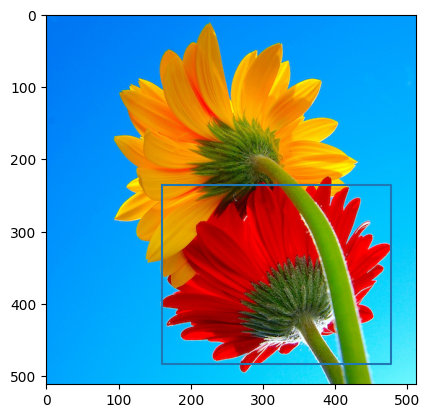

In [22]:
y = [imin,imin,imax,imax,imin]
x = [jmin,jmax,jmax,jmin,jmin]
plt.imshow(I)
plt.plot(x,y)
plt.show()

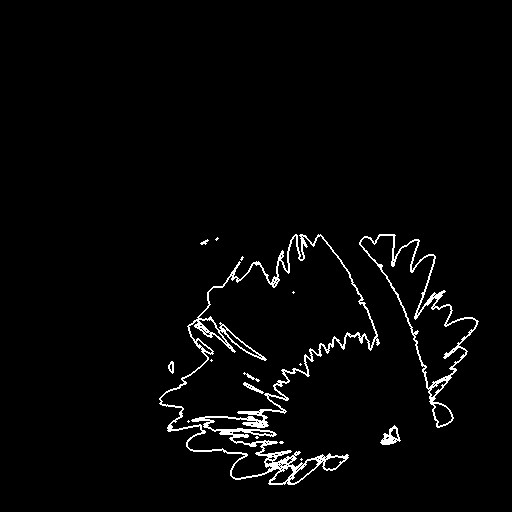

In [23]:
E = np.zeros((N,M), np.uint8)
for i in range(N):
    for j in range(1,M):
        if Q[i,j]!=Q[i,j-1]:
            E[i,j] = 1
            E[i,j-1] = 1
for i in range(1,N):
    for j in range(M):
        if Q[i-1,j]!=Q[i,j]:
            E[i,j] = 1
            E[i-1,j] = 1
cv2_imshow(E*255) #Replace if not in Google Colab

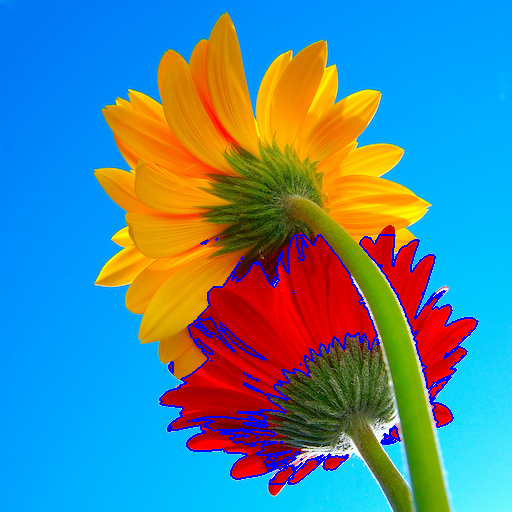

In [24]:
for i in range(N):
    for j in range(M):
        if E[i,j]==1:
            Icv[i,j,:] = [255,0,0] #Blue color
cv2_imshow(Icv) #Replace if not in Google Colab